In [977]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

#Sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

import string

import re

from tensorflow.keras.preprocessing.text import text_to_word_sequence

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from gensim.models import Word2Vec


In [908]:
df = pd.read_csv('/Users/andreacalcagni/code/AndreaCalcagni/neuroCraft/raw_data/CLEAR Corpus 6.01 - CLEAR Corpus 6.01.csv')


In [909]:
df.head()


,ID,Last Changed,Author,Title,Anthology,URL,Source,Pub Year,Category,Location,...,CAREC_M,CARES,CML2RI,firstPlace_pred,secondPlace_pred,thirdPlace_pred,fourthPlace_pred,fifthPlace_pred,sixthPlace_pred,Kaggle split
0,400,NaN,Carolyn Wells,Patty's Suitors,NaN,http://www.gutenberg.org/cache/epub/5631/pg563...,gutenberg,1914.0,Lit,mid,...,0.11952,0.457534,12.097815,-0.383831,-0.283604,-0.346879,-0.281620,-0.247767,-0.289945,Train
1,401,NaN,Carolyn Wells,Two Little Women on a Holiday,NaN,http://www.gutenberg.org/cache/epub/5893/pg589...,gutenberg,1917.0,Lit,mid,...,0.04921,0.462510,22.550179,-0.260307,-0.209960,-0.061565,-0.234231,-0.201347,-0.156156,Train
2,402,NaN,Carolyn Wells,Patty Blossom,NaN,http://www.gutenberg.org/cache/epub/20945/pg20...,gutenberg,1917.0,Lit,mid,...,0.09724,0.369259,18.125279,-0.615037,-0.530600,-0.527847,-0.550180,-0.565762,-0.538852,Train
3,403,NaN,CHARLES KINGSLEY,THE WATER-BABIES\nA Fairy Tale for a Land-Baby,NaN,http://www.gutenberg.org/files/25564/25564-h/2...,gutenberg,1863.0,Lit,mid,...,0.08856,0.390759,10.959460,-1.528806,-1.525546,-1.471455,-1.265776,-1.422547,-1.393155,Test
4,404,NaN,Charles Kingsley,HOW THE ARGONAUTS WERE DRIVEN INTO THE UNKNOWN...,The Heroes\n or Greek Fairy Tales for my...,http://www.gutenberg.org/files/677/677-h/677-h...,gutenberg,1889.0,Lit,mid,...,0.08798,0.389226,3.195960,-1.335586,-1.321922,-1.163985,-1.122501,-1.185518,-1.271324,Train


In [910]:
df.shape


(4724, 40)

In [911]:
df.columns


Index(['ID', 'Last Changed', 'Author', 'Title', 'Anthology', 'URL', 'Source',
       'Pub Year', 'Category', 'Location', 'License', 'MPAA\nMax',
       'MPAA \n#Max', 'MPAA\n#Avg', 'Excerpt', 'Google\nWC', 'Joon\nWC v1',
       'British WC', 'British Words', 'Sentence\nCount v1',
       'Sentence\nCount v2', 'Paragraphs', 'BT Easiness', 'BT s.e.',
       'Flesch-Reading-Ease', 'Flesch-Kincaid-Grade-Level',
       'Automated Readability Index', 'SMOG Readability',
       'New Dale-Chall Readability Formula', 'CAREC', 'CAREC_M', 'CARES',
       'CML2RI', 'firstPlace_pred', 'secondPlace_pred', 'thirdPlace_pred',
       'fourthPlace_pred', 'fifthPlace_pred', 'sixthPlace_pred',
       'Kaggle split'],
      dtype='object')

In [912]:
df = df.drop(columns=['Last Changed', 'URL', 'Anthology', 'MPAA \n#Max', 'Pub Year', 'MPAA\n#Avg', 'License', 'British Words', 'firstPlace_pred', 'secondPlace_pred', 'thirdPlace_pred',
       'fourthPlace_pred', 'fifthPlace_pred', 'sixthPlace_pred'])


In [913]:
df.head()


,ID,Author,Title,Source,Category,Location,MPAA\nMax,Excerpt,Google\nWC,Joon\nWC v1,...,Flesch-Reading-Ease,Flesch-Kincaid-Grade-Level,Automated Readability Index,SMOG Readability,New Dale-Chall Readability Formula,CAREC,CAREC_M,CARES,CML2RI,Kaggle split
0,400,Carolyn Wells,Patty's Suitors,gutenberg,Lit,mid,G,When the young people returned to the ballroom...,174,179,...,81.70,5.95,7.37,8.0,6.55,0.12102,0.11952,0.457534,12.097815,Train
1,401,Carolyn Wells,Two Little Women on a Holiday,gutenberg,Lit,mid,PG,"All through dinner time, Mrs. Fayre was somewh...",164,184,...,80.26,4.86,4.16,7.0,6.25,0.04921,0.04921,0.462510,22.550179,Train
2,402,Carolyn Wells,Patty Blossom,gutenberg,Lit,mid,PG,"As Roger had predicted, the snow departed as q...",162,180,...,79.04,6.03,5.81,9.0,7.31,0.10172,0.09724,0.369259,18.125279,Train
3,403,CHARLES KINGSLEY,THE WATER-BABIES\nA Fairy Tale for a Land-Baby,gutenberg,Lit,mid,PG-13,Mr. Grimes was to come up next morning to Sir ...,159,160,...,44.77,20.51,24.87,12.0,8.56,0.07491,0.08856,0.390759,10.959460,Test
4,404,Charles Kingsley,HOW THE ARGONAUTS WERE DRIVEN INTO THE UNKNOWN...,gutenberg,Lit,mid,PG,And outside before the palace a great garden w...,163,164,...,68.07,12.06,15.47,8.0,7.00,0.06356,0.08798,0.389226,3.195960,Train


In [914]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4724 entries, 0 to 4723
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  4724 non-null   int64  
 1   Author                              4724 non-null   object 
 2   Title                               4724 non-null   object 
 3   Source                              4724 non-null   object 
 4   Category                            4724 non-null   object 
 5   Location                            4724 non-null   object 
 6   MPAA
Max                            4724 non-null   object 
 7   Excerpt                             4724 non-null   object 
 8   Google
WC                           4724 non-null   int64  
 9   Joon
WC v1                          4724 non-null   int64  
 10  British WC                          4724 non-null   int64  
 11  Sentence
Count v1                   4724 no

In [915]:
# profile = ProfileReport(df, title="Profiling Report")


In [916]:
# profile.to_widgets()


In [917]:
df.Source.value_counts()


Source
gutenberg             2916
kids.frontiersin       458
commonlit              296
simple.wikipedia       275
wikipedia              274
africanstorybook       250
online-literature       95
digitallibrary          61
freekidsbooks           50
static.ehe.osu.edu      16
wikibooks               13
ukuqonda.co.za           4
ck12                     4
drive.google.com         4
emedia.uen.org           3
beyondpenguins           2
openschool.bc.ca         1
wikisource               1
beyondweather            1
Name: count, dtype: int64

In [918]:
df['MPAA\nMax'].value_counts()


MPAA\nMax
G        3706
PG        928
PG-13      87
R           3
Name: count, dtype: int64

<Axes: xlabel='BT Easiness', ylabel='Count'>

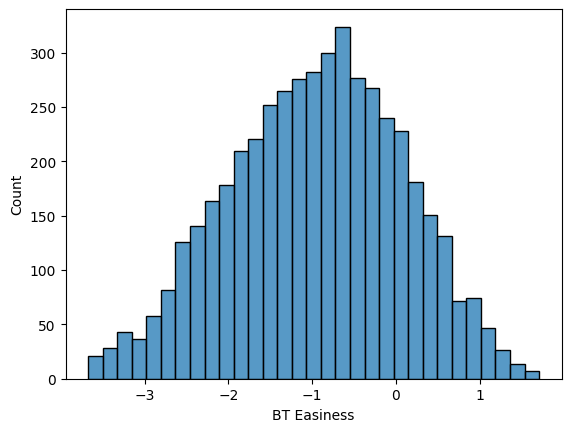

In [919]:
sns.histplot(data = df, x='BT Easiness')


In [920]:
np.mean(df['BT Easiness'])


-0.9576386305268841

In [921]:
np.median(df['BT Easiness'])


-0.9090941785

<Axes: xlabel='BT Easiness'>

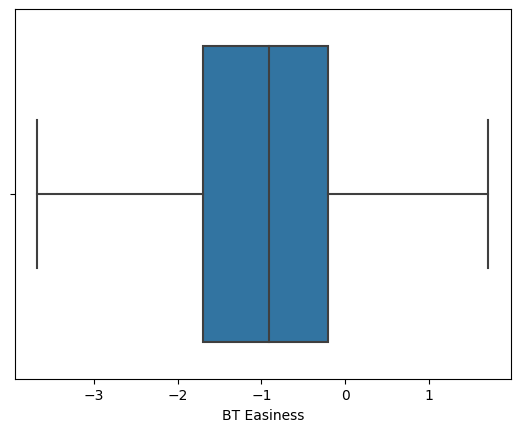

In [922]:
sns.boxplot(data = df, x='BT Easiness')


In [923]:
df[df['BT Easiness'] > 0]['Excerpt'].iloc[0]


'Once upon a time there were Three Bears who lived together in a house of their own in a wood. One of them was a Little, Small, Wee Bear; and one was a Middle-sized Bear, and the other was a Great, Huge Bear. They had each a pot for their porridge; a little pot for the Little, Small, Wee Bear; and a middle-sized pot for the Middle Bear; and a great pot for the Great, Huge Bear. And they had each a chair to sit in; a little chair for the Little, Small, Wee Bear; and a middle-sized chair for the Middle Bear; and a great chair for the Great, Huge Bear. And they had each a bed to sleep in; a little bed for the Little, Small, Wee Bear; and a middle-sized bed for the Middle Bear; and a great bed for the Great, Huge Bear.'

In [924]:
df[df['BT Easiness'] < -2]['Excerpt'].iloc[0]


"It was believed by the principal men of Virginia that Talbot's sympathies were with the revolted colonies; but the influence of his mother, to whom he had been accustomed to defer, had hitherto proved sufficient to prevent him from openly declaring himself. His visit to England, and the delightful reception he had met with there, had weakened somewhat the ties which bound him to his native country, and he found himself in a state of indecision as humiliating as it was painful. Lord Dunmore and Colonel Wilton had each made great efforts to enlist his support, on account of his wealth and position and high personal qualities. It was hinted by one that the ancient barony of the Talbots would be revived by the king; and the gratitude of a free and grateful country, with the consciousness of having materially aided in acquiring that independence which should be the birthright of every Englishman, was eloquently portrayed by the other. When to the last plea was added the personal preference

# Feature Creation

### Adding Excerpt lenght in characters feature

In [925]:
df['len_char'] = df['Excerpt'].apply(lambda x: len(x))


### Adding Punctuation Ratio

In [926]:
import string

def count_punctuation(x):

    punc = string.punctuation

    count=0

    for char in x:
        if char in punc:
            count+=1

    return count/ len(x)

df['punctuation_ratio'] = df['Excerpt'].apply(count_punctuation)

df.head()


,ID,Author,Title,Source,Category,Location,MPAA\nMax,Excerpt,Google\nWC,Joon\nWC v1,...,Automated Readability Index,SMOG Readability,New Dale-Chall Readability Formula,CAREC,CAREC_M,CARES,CML2RI,Kaggle split,len_char,punctuation_ratio
0,400,Carolyn Wells,Patty's Suitors,gutenberg,Lit,mid,G,When the young people returned to the ballroom...,174,179,...,7.37,8.0,6.55,0.12102,0.11952,0.457534,12.097815,Train,992,0.027218
1,401,Carolyn Wells,Two Little Women on a Holiday,gutenberg,Lit,mid,PG,"All through dinner time, Mrs. Fayre was somewh...",164,184,...,4.16,7.0,6.25,0.04921,0.04921,0.462510,22.550179,Train,937,0.059765
2,402,Carolyn Wells,Patty Blossom,gutenberg,Lit,mid,PG,"As Roger had predicted, the snow departed as q...",162,180,...,5.81,9.0,7.31,0.10172,0.09724,0.369259,18.125279,Train,908,0.051762
3,403,CHARLES KINGSLEY,THE WATER-BABIES\nA Fairy Tale for a Land-Baby,gutenberg,Lit,mid,PG-13,Mr. Grimes was to come up next morning to Sir ...,159,160,...,24.87,12.0,8.56,0.07491,0.08856,0.390759,10.959460,Test,848,0.036557
4,404,Charles Kingsley,HOW THE ARGONAUTS WERE DRIVEN INTO THE UNKNOWN...,gutenberg,Lit,mid,PG,And outside before the palace a great garden w...,163,164,...,15.47,8.0,7.00,0.06356,0.08798,0.389226,3.195960,Train,909,0.036304


### Adding Average Sentence Lenght

In [927]:
def sentence_len(x):

    x = x.replace("?",'.').replace("!",'.')

    sentences = x.split('.')

    sentences = [sentence for sentence in sentences if len(sentence) > 0]

    sent_len = [len(sentence.split()) for sentence in sentences]

    return np.mean(sent_len)


In [928]:
df['avg_sentence_len'] = df['Excerpt'].apply(sentence_len)

df.head()


,ID,Author,Title,Source,Category,Location,MPAA\nMax,Excerpt,Google\nWC,Joon\nWC v1,...,SMOG Readability,New Dale-Chall Readability Formula,CAREC,CAREC_M,CARES,CML2RI,Kaggle split,len_char,punctuation_ratio,avg_sentence_len
0,400,Carolyn Wells,Patty's Suitors,gutenberg,Lit,mid,G,When the young people returned to the ballroom...,174,179,...,8.0,6.55,0.12102,0.11952,0.457534,12.097815,Train,992,0.027218,16.272727
1,401,Carolyn Wells,Two Little Women on a Holiday,gutenberg,Lit,mid,PG,"All through dinner time, Mrs. Fayre was somewh...",164,184,...,7.0,6.25,0.04921,0.04921,0.462510,22.550179,Train,937,0.059765,10.235294
2,402,Carolyn Wells,Patty Blossom,gutenberg,Lit,mid,PG,"As Roger had predicted, the snow departed as q...",162,180,...,9.0,7.31,0.10172,0.09724,0.369259,18.125279,Train,908,0.051762,13.076923
3,403,CHARLES KINGSLEY,THE WATER-BABIES\nA Fairy Tale for a Land-Baby,gutenberg,Lit,mid,PG-13,Mr. Grimes was to come up next morning to Sir ...,159,160,...,12.0,8.56,0.07491,0.08856,0.390759,10.959460,Test,848,0.036557,39.750000
4,404,Charles Kingsley,HOW THE ARGONAUTS WERE DRIVEN INTO THE UNKNOWN...,gutenberg,Lit,mid,PG,And outside before the palace a great garden w...,163,164,...,8.0,7.00,0.06356,0.08798,0.389226,3.195960,Train,909,0.036304,32.800000


### Adding average word lenght in chars

In [929]:
def avg_word_lenght(x):

    punctuation = string.punctuation
    for punc in punctuation:
        x = x.replace(punc,' ')

    words = x.split(' ')

    words = [word for word in words if len(word) > 0]

    word_len = [len(word) for word in words]

    return np.mean(word_len)


In [930]:
df['avg_word_len'] = df['Excerpt'].apply(avg_word_lenght)

df.head()


,ID,Author,Title,Source,Category,Location,MPAA\nMax,Excerpt,Google\nWC,Joon\nWC v1,...,New Dale-Chall Readability Formula,CAREC,CAREC_M,CARES,CML2RI,Kaggle split,len_char,punctuation_ratio,avg_sentence_len,avg_word_len
0,400,Carolyn Wells,Patty's Suitors,gutenberg,Lit,mid,G,When the young people returned to the ballroom...,174,179,...,6.55,0.12102,0.11952,0.457534,12.097815,Train,992,0.027218,16.272727,4.375691
1,401,Carolyn Wells,Two Little Women on a Holiday,gutenberg,Lit,mid,PG,"All through dinner time, Mrs. Fayre was somewh...",164,184,...,6.25,0.04921,0.04921,0.462510,22.550179,Train,937,0.059765,10.235294,4.102857
2,402,Carolyn Wells,Patty Blossom,gutenberg,Lit,mid,PG,"As Roger had predicted, the snow departed as q...",162,180,...,7.31,0.10172,0.09724,0.369259,18.125279,Train,908,0.051762,13.076923,4.000000
3,403,CHARLES KINGSLEY,THE WATER-BABIES\nA Fairy Tale for a Land-Baby,gutenberg,Lit,mid,PG-13,Mr. Grimes was to come up next morning to Sir ...,159,160,...,8.56,0.07491,0.08856,0.390759,10.959460,Test,848,0.036557,39.750000,4.018293
4,404,Charles Kingsley,HOW THE ARGONAUTS WERE DRIVEN INTO THE UNKNOWN...,gutenberg,Lit,mid,PG,And outside before the palace a great garden w...,163,164,...,7.00,0.06356,0.08798,0.389226,3.195960,Train,909,0.036304,32.800000,4.275449


### Adding Average Number of Words per Sentence

In [931]:
df['avg_word_sent'] = df['Google\nWC']/df['Sentence\nCount v1']
df.head()


,ID,Author,Title,Source,Category,Location,MPAA\nMax,Excerpt,Google\nWC,Joon\nWC v1,...,CAREC,CAREC_M,CARES,CML2RI,Kaggle split,len_char,punctuation_ratio,avg_sentence_len,avg_word_len,avg_word_sent
0,400,Carolyn Wells,Patty's Suitors,gutenberg,Lit,mid,G,When the young people returned to the ballroom...,174,179,...,0.12102,0.11952,0.457534,12.097815,Train,992,0.027218,16.272727,4.375691,15.818182
1,401,Carolyn Wells,Two Little Women on a Holiday,gutenberg,Lit,mid,PG,"All through dinner time, Mrs. Fayre was somewh...",164,184,...,0.04921,0.04921,0.462510,22.550179,Train,937,0.059765,10.235294,4.102857,10.933333
2,402,Carolyn Wells,Patty Blossom,gutenberg,Lit,mid,PG,"As Roger had predicted, the snow departed as q...",162,180,...,0.10172,0.09724,0.369259,18.125279,Train,908,0.051762,13.076923,4.000000,14.727273
3,403,CHARLES KINGSLEY,THE WATER-BABIES\nA Fairy Tale for a Land-Baby,gutenberg,Lit,mid,PG-13,Mr. Grimes was to come up next morning to Sir ...,159,160,...,0.07491,0.08856,0.390759,10.959460,Test,848,0.036557,39.750000,4.018293,53.000000
4,404,Charles Kingsley,HOW THE ARGONAUTS WERE DRIVEN INTO THE UNKNOWN...,gutenberg,Lit,mid,PG,And outside before the palace a great garden w...,163,164,...,0.06356,0.08798,0.389226,3.195960,Train,909,0.036304,32.800000,4.275449,32.600000


### Adding Lexical Diversity Scores

### Adding Morphological Information

# Dummy baseline model

### Train Test Split

In [932]:
# 60% train test split as the Kaggle competition
df_train = df[df['Kaggle split'] == 'Train']
df_test = df[df['Kaggle split'] == 'Test']


In [933]:
X_train = df_train.drop(columns=['Kaggle split', 'BT Easiness', 'BT s.e.'])
y_train = df_train['BT Easiness']


In [934]:
X_test = df_test.drop(columns=['Kaggle split', 'BT Easiness', 'BT s.e.'])
y_test = df_test['BT Easiness']


### Dummy prediction using BE Average

In [935]:
y_pred = np.mean(y_train)
y_pred = array = np.full(y_test.shape, y_pred)
y_pred


array([-0.95931877, -0.95931877, -0.95931877, ..., -0.95931877,
       -0.95931877, -0.95931877])

In [936]:
y_test.shape


(1890,)

In [937]:
baseline_mse = mean_squared_error(y_test, y_pred)
baseline_mse


1.0686917471433572

In [938]:
baseline_rmse = mean_squared_error(y_test, y_pred, squared=False)
baseline_rmse


1.0337754819801819

### Creating RMSE score

In [939]:
rmsle_neg = make_scorer(
    lambda y_true, y_pred: mean_squared_error(y_true, y_pred)**0.5,
    greater_is_better=False
)


# Preprocessing Workflow

In [940]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4724 entries, 0 to 4723
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  4724 non-null   int64  
 1   Author                              4724 non-null   object 
 2   Title                               4724 non-null   object 
 3   Source                              4724 non-null   object 
 4   Category                            4724 non-null   object 
 5   Location                            4724 non-null   object 
 6   MPAA
Max                            4724 non-null   object 
 7   Excerpt                             4724 non-null   object 
 8   Google
WC                           4724 non-null   int64  
 9   Joon
WC v1                          4724 non-null   int64  
 10  British WC                          4724 non-null   int64  
 11  Sentence
Count v1                   4724 no

## Drop Duplicates

In [941]:
X_train.duplicated().sum()


0

In [942]:
X_test.duplicated().sum()


0

#### No duplicates found

## Missing Values

#### only pub year has misisng values, decide wheather to drop or not

In [943]:
# Counting the number of NaN for each column
df.isnull().sum().sort_values(ascending=False)


ID                                    0
Flesch-Reading-Ease                   0
avg_word_len                          0
avg_sentence_len                      0
punctuation_ratio                     0
len_char                              0
Kaggle split                          0
CML2RI                                0
CARES                                 0
CAREC_M                               0
CAREC                                 0
New Dale-Chall Readability Formula    0
SMOG Readability                      0
Automated Readability Index           0
Flesch-Kincaid-Grade-Level            0
BT s.e.                               0
Author                                0
BT Easiness                           0
Paragraphs                            0
Sentence\nCount v2                    0
Sentence\nCount v1                    0
British WC                            0
Joon\nWC v1                           0
Google\nWC                            0
Excerpt                               0


## checking outliers

#### let's start with standard scaling, otherwise we can check also robust

In [944]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])


In [945]:
# # checking outliers with boxplots
# for column in numerical_df.columns:
#     plt.figure()  # Create a new figure
#     numerical_df[[column]].boxplot()
#     plt.title(column)  # Optional: adds a title to each plot
#     plt.show()


## Scaling

In [946]:
# sklearn.preprocessing.RobustScaler
# or standard scaler


## Encoding

In [947]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html


## Discretizing target

In [948]:
# data['SalePriceBinary'] = pd.cut(x = data['SalePrice'],
#                                  bins=[data['SalePrice'].min()-1,
#                                        data['SalePrice'].mean(),
#                                        data['SalePrice'].max()+1],
#                                  labels=['cheap', 'expensive'])

# data.head()


## Feature Permutation

# Preprocessing Pipeline

### num Features pipe

In [949]:
# Build the pipeline with the different steps
num_preproc_pipeline = Pipeline([
    ('standard_scaler', StandardScaler()),

])


### Cat Features pipe

#### As of now I am dropping the categorical features as they are probably note relevant for our final objective

### Discretizing Target

#### discretizing target in two categories 0 = Hard and 1 = Easy

In [950]:
# Calculating quantiles for bin edges - 7 edges for 6 bins
quantiles = df['BT Easiness'].quantile([0, 0.1667, 0.3333, 0.5, 0.6667, 0.8333, 1]).tolist()
quantiles


[-3.676267773,
 -2.0329096932509003,
 -1.409577679951,
 -0.9090941785,
 -0.46278055254539985,
 0.08201879812629961,
 1.711389827]

In [951]:
# Correct number of labels for 6 bins
labels_dict = {'very hard':0, 'hard':1, 'moderately hard':2, 'acceptable':3, 'easy':4, 'very easy':5}

# Using 'quantiles' for bins and including 6 labels
df['BT Easiness'] = pd.cut(
    x=df['BT Easiness'],
    bins=quantiles,
    labels=labels_dict.values(),
    include_lowest=True
)

# Displaying the first few rows of the DataFrame
df.head()


,ID,Author,Title,Source,Category,Location,MPAA\nMax,Excerpt,Google\nWC,Joon\nWC v1,...,CAREC,CAREC_M,CARES,CML2RI,Kaggle split,len_char,punctuation_ratio,avg_sentence_len,avg_word_len,avg_word_sent
0,400,Carolyn Wells,Patty's Suitors,gutenberg,Lit,mid,G,When the young people returned to the ballroom...,174,179,...,0.12102,0.11952,0.457534,12.097815,Train,992,0.027218,16.272727,4.375691,15.818182
1,401,Carolyn Wells,Two Little Women on a Holiday,gutenberg,Lit,mid,PG,"All through dinner time, Mrs. Fayre was somewh...",164,184,...,0.04921,0.04921,0.462510,22.550179,Train,937,0.059765,10.235294,4.102857,10.933333
2,402,Carolyn Wells,Patty Blossom,gutenberg,Lit,mid,PG,"As Roger had predicted, the snow departed as q...",162,180,...,0.10172,0.09724,0.369259,18.125279,Train,908,0.051762,13.076923,4.000000,14.727273
3,403,CHARLES KINGSLEY,THE WATER-BABIES\nA Fairy Tale for a Land-Baby,gutenberg,Lit,mid,PG-13,Mr. Grimes was to come up next morning to Sir ...,159,160,...,0.07491,0.08856,0.390759,10.959460,Test,848,0.036557,39.750000,4.018293,53.000000
4,404,Charles Kingsley,HOW THE ARGONAUTS WERE DRIVEN INTO THE UNKNOWN...,gutenberg,Lit,mid,PG,And outside before the palace a great garden w...,163,164,...,0.06356,0.08798,0.389226,3.195960,Train,909,0.036304,32.800000,4.275449,32.600000


In [952]:
# df['BT Easiness'] = pd.cut(x = df['BT Easiness'],
#                                  bins=[df['BT Easiness'].min()-1,
#                                        df['BT Easiness'].mean(),
#                                        df['BT Easiness'].max()+1],
#                                  labels=[0, 1])


In [953]:
df[['Excerpt', 'BT Easiness']].head()


,Excerpt,BT Easiness
0,When the young people returned to the ballroom...,4
1,"All through dinner time, Mrs. Fayre was somewh...",4
2,"As Roger had predicted, the snow departed as q...",3
3,Mr. Grimes was to come up next morning to Sir ...,1
4,And outside before the palace a great garden w...,2


### Label Encoding

In [954]:
# # Instantiate the LabelEncoder
# label_encoder = LabelEncoder()

# # Fit it to the target
# label_encoder.fit(df['BT Easiness'])

# # Find the encoded classes
# print(f"The Label Encoder has encoded the penguin classes into {label_encoder.classes_}")

# # Transform the targets
# df['encoded_target'] = label_encoder.transform(df['BT Easiness'])


In [955]:
# df[['Excerpt', 'BT Easiness','encoded_target']]


## Text Preprocessing

### Basic Cleaning

In [961]:
def basic_cleaning(sentence):
    sentence = sentence.lower()
    sentence = ''.join(char for char in sentence if not char.isdigit())

    # Adding special quotes to the regular expression pattern
    special_quotes = '“”‘’'
    pattern = '[' + re.escape(string.punctuation + special_quotes) + ']'

    sentence = re.sub(pattern, '', sentence)
    sentence = sentence.strip()

    return sentence


In [962]:
df['Excerpt'] = df['Excerpt'].apply(basic_cleaning)
df['Excerpt']


0       when the young people returned to the ballroom...
1       all through dinner time mrs fayre was somewhat...
2       as roger had predicted the snow departed as qu...
3       mr grimes was to come up next morning to sir j...
4       and outside before the palace a great garden w...
                              ...                        
4719    the name monarch means king an adult monarch b...
4720    walking sticks are long thin and slowmoving bu...
4721    a black widow is a shiny black spider it has a...
4722    solids are shapes that you can actually touch ...
4723    animals are made of many cells they eat things...
Name: Excerpt, Length: 4724, dtype: object

### Tokenizing

In [963]:
#tokenizing
df['Excerpt'] = df['Excerpt'].apply(lambda x: text_to_word_sequence(x))
df['Excerpt']


0       [when, the, young, people, returned, to, the, ...
1       [all, through, dinner, time, mrs, fayre, was, ...
2       [as, roger, had, predicted, the, snow, departe...
3       [mr, grimes, was, to, come, up, next, morning,...
4       [and, outside, before, the, palace, a, great, ...
                              ...                        
4719    [the, name, monarch, means, king, an, adult, m...
4720    [walking, sticks, are, long, thin, and, slowmo...
4721    [a, black, widow, is, a, shiny, black, spider,...
4722    [solids, are, shapes, that, you, can, actually...
4723    [animals, are, made, of, many, cells, they, ea...
Name: Excerpt, Length: 4724, dtype: object

### Lemmatizing

In [970]:
def lemmatizer(sentence):
    wnl = WordNetLemmatizer()
    verbs_lemmatized = []
    for word in sentence:
        verbs_lemmatized.append(wnl.lemmatize(word, pos = 'v'))
    nouns_lemmatized = []
    for word in verbs_lemmatized:
        nouns_lemmatized.append(wnl.lemmatize(word, pos = 'n'))
    adverbs_lemmatized = []
    for word in nouns_lemmatized:
        adverbs_lemmatized.append(wnl.lemmatize(word, pos = 'r'))
    adj_lemmatized = []
    for word in adverbs_lemmatized:
        adj_lemmatized.append(wnl.lemmatize(word, pos = 'a'))
    sat_lemmatized = []
    for word in adj_lemmatized:
        sat_lemmatized.append(wnl.lemmatize(word, pos = 'a'))
    return sat_lemmatized


In [971]:
df['Excerpt'] = df['Excerpt'].apply(lambda x: lemmatizer(x))
df['Excerpt']


0       [when, the, young, people, return, to, the, ba...
1       [all, through, dinner, time, mr, fayre, be, so...
2       [a, roger, have, predict, the, snow, depart, a...
3       [mr, grime, be, to, come, up, next, morning, t...
4       [and, outside, before, the, palace, a, great, ...
                              ...                        
4719    [the, name, monarch, mean, king, an, adult, mo...
4720    [walk, stick, be, long, thin, and, slowmoving,...
4721    [a, black, widow, be, a, shiny, black, spider,...
4722    [solid, be, shape, that, you, can, actually, t...
4723    [animal, be, make, of, many, cell, they, eat, ...
Name: Excerpt, Length: 4724, dtype: object

### Removing Stopwords

In [974]:
def removing_stopwords(sentence):
    stop_words = set(stopwords.words('english'))
    sentence_new = [w for w in sentence if not w in stop_words]
    return sentence_new


In [975]:
df['Excerpt'] = df['Excerpt'].apply(lambda x: removing_stopwords(x))
df['Excerpt']


0       [young, people, return, ballroom, present, dec...
1       [dinner, time, mr, fayre, somewhat, silent, ey...
2       [roger, predict, snow, depart, quickly, come, ...
3       [mr, grime, come, next, morning, sir, john, ha...
4       [outside, palace, great, garden, wall, round, ...
                              ...                        
4719    [name, monarch, mean, king, adult, monarch, bu...
4720    [walk, stick, long, thin, slowmoving, bug, loo...
4721    [black, widow, shiny, black, spider, orange, r...
4722    [solid, shape, actually, touch, three, dimensi...
4723    [animal, make, many, cell, eat, thing, digest,...
Name: Excerpt, Length: 4724, dtype: object

# Train Test Split

In [ ]:
df = df.drop(columns=['ID', 'Author', 'Title', 'Source', 'Category', 'Location', 'MPAA\nMax', 'BT s.e.', 'Kaggle split'])


In [ ]:
df.columns


Index(['Excerpt', 'Google\nWC', 'Joon\nWC v1', 'British WC',
       'Sentence\nCount v1', 'Sentence\nCount v2', 'Paragraphs', 'BT Easiness',
       'Flesch-Reading-Ease', 'Flesch-Kincaid-Grade-Level',
       'Automated Readability Index', 'SMOG Readability',
       'New Dale-Chall Readability Formula', 'CAREC', 'CAREC_M', 'CARES',
       'CML2RI', 'len_char', 'punctuation_ratio', 'avg_sentence_len',
       'avg_word_len', 'avg_word_sent'],
      dtype='object')

In [ ]:
X = df.drop(columns=['BT Easiness'])
y = df['BT Easiness']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Dummy Baseline Model

In [ ]:
y_train.value_counts()


BT Easiness
2    571
3    557
0    551
1    551
4    539
5    537
Name: count, dtype: int64

In [ ]:
y_pred = y_train.value_counts().idxmax()
y_pred = np.full(y_test.shape, y_pred)
y_pred


array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
accuracy_baseline = accuracy_score(y_test, y_pred)
accuracy_baseline


0.152327221438646